In [1]:
import numpy as np   # to work with arrays, linear  algebra, matrices
import pandas as pd  #data manipulation and analysis offers datasturers and operators for manipulating numericals tables and time series
import seaborn as sns # based on matplotlib used for data exploration and visualisation
import matplotlib.pyplot as plt # data visualisation and gui


In [2]:
df = pd.read_csv("C:/Users/atharva/OneDrive/Desktop/self learn data science/machine learning algorithms/marketing analytics/market basket analysis/Groceries_dataset.csv")

In [3]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk
...,...,...,...
38760,4471,8/10/2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,3/12/2014,fruit/vegetable juice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.isnull().sum().sort_values(ascending = False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df["Date"])

C:\Users\atharva\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\atharva\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\atharva\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\atharva\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format o

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [9]:
item_distr = df.groupby(by = 'itemDescription').size().reset_index(name = 'frequency').sort_values(by = 'frequency', ascending = False).head(10)

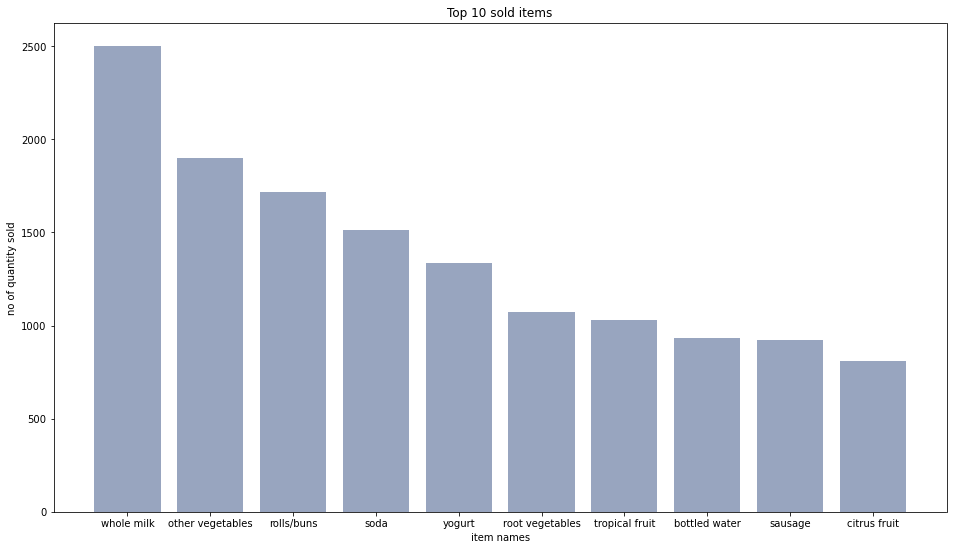

In [10]:
bars = item_distr['itemDescription']
height = item_distr['frequency']
x_position = np.arange(len(bars))
plt.figure(figsize = (16,9))
plt.bar(x_position, height, color =(0.2,0.3,0.5,0.5))
plt.title('Top 10 sold items')
plt.xlabel('item names')
plt.ylabel('no of quantity sold')
plt.xticks(x_position,bars)
plt.show()

In [11]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


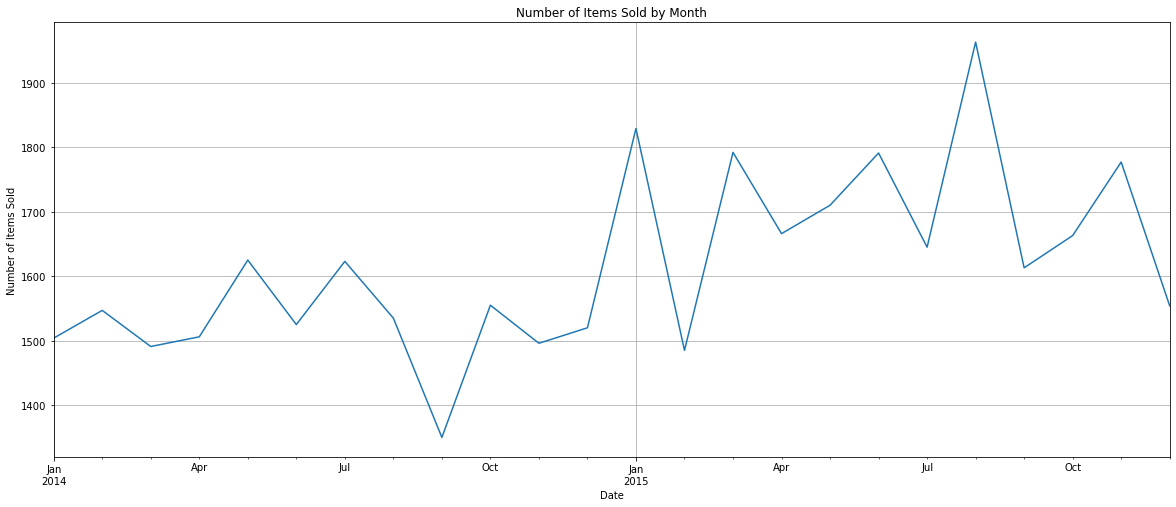

In [12]:
# Resample by month and count the number of items sold
monthly_counts = df_date['itemDescription'].resample('M').count()

# Plot the data
monthly_counts.plot(figsize=(20, 8), grid=True, title='Number of Items Sold by Month')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')
plt.show()

In [13]:
# Select the specified columns from the DataFrame
cust_level = df[['Member_number', 'itemDescription']]

# Sort the DataFrame by 'Member_number' in descending order
cust_level = cust_level.sort_values(by='Member_number', ascending=False)

# Remove leading and trailing whitespace from 'itemDescription'
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()

cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [14]:
# Group 'cust_level' DataFrame by 'member_number' and extract item descriptions as lists for each member
transactions = [a[1]['itemDescription'].tolist() for a  in list(cust_level.groupby(['Member_number']))]

In [15]:
from apyori import apriori
rules = apriori(transactions=transactions, min_support=0.002, min_confidence=0.05, min_lift=3, min_length=2)

In [16]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [17]:

from apyori import apriori
rules = apriori(transactions=transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2)

In [25]:
results = list(rules)

In [28]:
results

[]

In [29]:
def inspect (results):
    lhs = [tuple (result[2][0][0])[0]for result in results]
    rhs = [tuple (result[2][0][1])[0]for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3]for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsindataframe = pd.DataFrame(inspect(results),columns = ['Left Hand Sise', 'Right Hand Side', 'Support', 'Confidences', 'Lift'])
                   

In [30]:
# Convert the 'Lift' column to a numeric data type (e.g., float)
resultsindataframe['Lift'] = resultsindataframe['Lift'].astype(float)

# Now, you can use the nlargest function
top_10_results = resultsindataframe.nlargest(10, columns='Lift')

In [31]:
top_10_results

,Left Hand Sise,Right Hand Side,Support,Confidences,Lift
